# Ford GoBike System Data Exploration
## by Ayooluwa Jesuniyi

## Introduction
> This notebook explores a dataset containing information of a bike-sharing system of approximately 183,412 rides covering the greater San Francisco Bay area in 2019. The dataset being used for this project is the Ford GoBike System Dataset, provided by Udacity.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar
from datetime import datetime

%matplotlib inline



#### Gather

In [2]:
# load adta into pandas dataframe
gobike = pd.read_csv('201902-fordgobike-tripdata.csv')

#### Assessing

In [3]:
# checking the shape of the dataset
print(gobike.shape)

(183412, 16)


In [4]:
# overview of the datatype of each column in the dataset
print(gobike.dtypes)

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [5]:
# checking null values count in each column in the dataset
gobike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
gobike.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [7]:
gobike.tail(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183402,122,2019-02-01 00:17:32.2580,2019-02-01 00:19:34.9380,119.0,18th St at Noe St,37.761047,-122.432642,120.0,Mission Dolores Park,37.761420,-122.426435,4326,Subscriber,NaN,NaN,No
183403,249,2019-02-01 00:15:12.0670,2019-02-01 00:19:21.6990,256.0,Hearst Ave at Euclid Ave,37.875112,-122.260553,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,4642,Subscriber,2000.0,Male,No
183404,256,2019-02-01 00:12:50.5540,2019-02-01 00:17:07.3620,241.0,Ashby BART Station,37.852477,-122.270213,248.0,Telegraph Ave at Ashby Ave,37.855956,-122.259795,4845,Subscriber,1980.0,Male,Yes
183405,111,2019-02-01 00:14:49.8740,2019-02-01 00:16:41.3010,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,19.0,Post St at Kearny St,37.788975,-122.403452,4832,Subscriber,1984.0,Male,No
183406,706,2019-02-01 00:04:40.6160,2019-02-01 00:16:27.0800,138.0,Jersey St at Church St,37.750900,-122.427411,78.0,Folsom St at 9th St,37.773717,-122.411647,5017,Subscriber,1988.0,Male,No
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


In [8]:
#showing info on columns
gobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [9]:
# checking a brief satistics on the columns with numerical values in the dataset
gobike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [10]:
# checking the unique values in the user_type column and the value count
print('\033[1m''Types of Users:''\033[1m')
print(gobike['user_type'].value_counts())
print('\n')

# checking the unique values in the member_gender column and the count of each
print('Gender of users:')
print(gobike['member_gender'].value_counts())
print('\n')

# checking the unique vakues in the bike_share_for_all_trip column and count of each
print('Bike share for all trips?')
print(gobike['bike_share_for_all_trip'].value_counts())

Types of Users:
Subscriber    163544
Customer       19868
Name: user_type, dtype: int64


Gender of users:
Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64


Bike share for all trips?
No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64


#### Cleaning

In [11]:
# making a copy of the dataset before cleaning
gobike_clean = gobike.copy()

In [12]:
# creating column for duration minutes from the values in duration_sec
gobike_clean['duration_min'] = round(gobike_clean['duration_sec']/60)

In [13]:
# extracting the start date from the start_time column
gobike_clean['start_date']= pd.DatetimeIndex(gobike_clean['start_time']).normalize()

# extrating the day of the week from start_date
gobike_clean['start_day'] = gobike_clean.start_date.dt.day_name()

# extracting the end date from the end_time column
gobike_clean['end_date']= pd.DatetimeIndex(gobike_clean['end_time']).normalize()

# extrating the day of the week from end_date
gobike_clean['end_day'] = gobike_clean.end_date.dt.day_name()

In [14]:
#extract the value of start hour and end hour from start_time
gobike_clean['start_hour']= pd.DatetimeIndex(gobike_clean['start_time']).hour

In [15]:
# grouping the time of the day into the followint: Late Night, Early Morning, Morning, Noon, Eve, Night
b = [0,4,8,12,16,20,24]
l = ['Late Night', 'Early Morning','Morning','Noon','Evening','Night']
gobike_clean['time_of_day'] = pd.cut(gobike_clean['start_hour'],bins=b, labels= l, include_lowest = True)

In [16]:
# extracting age from member_birth_year
gobike_clean['age'] = datetime.now().year - gobike_clean['member_birth_year']
gobike_clean['age'] = gobike_clean.age.fillna(0.0).astype(int)

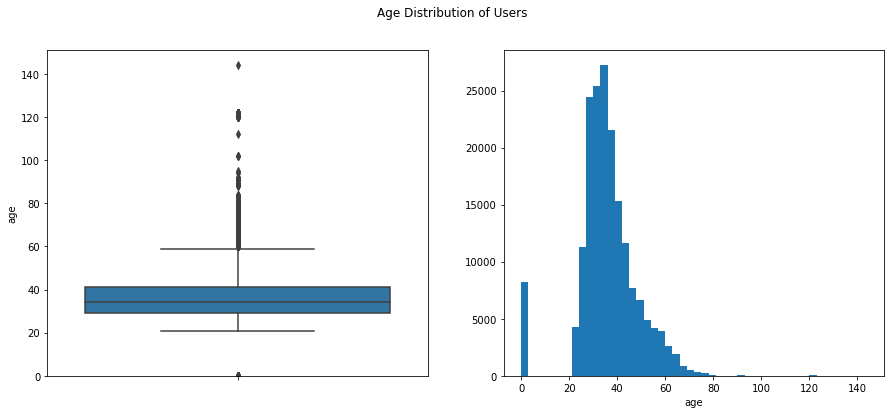

In [17]:
# plot showing the age distribution of riders
plt.figure(figsize = [15, 6])

# first sub-plot
plt.subplot(1, 2, 1)
sb.boxplot(data=gobike_clean, y='age')
plt.ylim(ymin=0);

# second sub-plot
plt.subplot(1, 2, 2)
bins_age= np.arange(0, gobike_clean['age'].max()+3, 3)
plt.hist(data=gobike_clean, x='age',bins=bins_age)
plt.xlabel('age');

plt.suptitle('Age Distribution of Users');

From the charts above, it is shown that there are outliers in the age distribution of the users (0, 70+). I will be removing the rows containing these ages from the dataset as no user should be age zero(0), and it is uncommon of people over 70 years old to ride bicycles. We can also see the population of these age groups in the data are ridiculosly low.


In [18]:
# this code will remove any records with age value below 20 and above 60
gobike_clean = gobike_clean.query('age >20<60')
gobike_clean = gobike_clean.query('age <60')

In [19]:
# creating age groups/categories into three
gobike_clean.loc[((gobike_clean['age']>=21)&(gobike_clean['age']<=25)), 'age_category'] = '21-25'
gobike_clean.loc[((gobike_clean['age']>=26)&(gobike_clean['age']<=30)), 'age_category'] = '26-30'
gobike_clean.loc[((gobike_clean['age']>=31)&(gobike_clean['age']<=35)), 'age_category'] = '31-35'
gobike_clean.loc[((gobike_clean['age']>=36)&(gobike_clean['age']<=40)), 'age_category'] = '36-40'
gobike_clean.loc[((gobike_clean['age']>=41)&(gobike_clean['age']<=45)), 'age_category'] = '41-45'
gobike_clean.loc[((gobike_clean['age']>=46)&(gobike_clean['age']<=50)), 'age_category'] = '46-50'
gobike_clean.loc[((gobike_clean['age']>=51)&(gobike_clean['age']<=56)), 'age_category'] = '51-55'
gobike_clean.loc[(gobike_clean['age']>=56), 'age_category'] = '56-60'

In [20]:
# dropping columns not needed
drop_columns = ['duration_sec', 'start_time','end_time','start_station_latitude','start_station_longitude',
                'start_station_id','end_station_latitude','end_station_longitude','end_station_id','member_birth_year',]
gobike_clean.drop(drop_columns, axis=1, inplace = True)


In [21]:
# convert into ordered categorical types
ordinal_var_dict = {'user_type': ['Subscriber','Customer'],
                    'member_gender': ['Male', 'Female', 'Other'],
                    'bike_share_for_all_trip': ['No', 'Yes'],
                   'start_day': ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
                   'end_day': ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
                   'time_of_day': ['Late Night', 'Early Morning','Morning','Noon','Evening','Night'],
                   'age_category': ['21-25','26-30', '31-35', '36-40', '41-45', '46-50', '51-55','56-60']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    gobike_clean[var] = gobike_clean[var].astype(ordered_var)

In [22]:
gobike_clean['age'].unique()

array([38, 50, 33, 48, 39, 34, 30, 26, 29, 32, 41, 47, 44, 31, 25, 36, 22,
       40, 27, 42, 49, 37, 51, 43, 55, 24, 28, 45, 23, 35, 53, 59, 46, 58,
       57, 54, 56, 52, 21])

In [23]:
# re-arranging columns in the gobike dataframe using reindex()
column_names = ['bike_id', 'user_type', 'member_gender', 'duration_min', 'start_station_name',
                'start_date', 'start_day', 'end_station_name', 'end_date', 'end_day', 'start_hour',
                'time_of_day', 'age', 'age_category', 'bike_share_for_all_trip']
gobike_clean = gobike_clean.reindex(columns=column_names)

# taking a look at a sample of the current update on the dataset
gobike_clean.sample(10)

,bike_id,user_type,member_gender,duration_min,start_station_name,start_date,start_day,end_station_name,end_date,end_day,start_hour,time_of_day,age,age_category,bike_share_for_all_trip
174368,5226,Subscriber,Male,10.0,5th St at Brannan St,2019-02-02,Saturday,Powell St BART Station (Market St at 5th St),2019-02-02,Saturday,18,Evening,34,31-35,No
168703,4915,Subscriber,Male,8.0,Telegraph Ave at Ashby Ave,2019-02-04,Monday,Bancroft Way at Telegraph Ave,2019-02-04,Monday,13,Noon,27,26-30,No
71722,6591,Subscriber,Female,6.0,Powell St BART Station (Market St at 4th St),2019-02-19,Tuesday,Broadway at Kearny,2019-02-19,Tuesday,17,Evening,34,31-35,No
25872,6572,Subscriber,Male,7.0,8th St at Brannan St,2019-02-25,Monday,Powell St BART Station (Market St at 5th St),2019-02-25,Monday,15,Noon,38,36-40,No
3571,5104,Subscriber,Male,7.0,West Oakland BART Station,2019-02-28,Thursday,32nd St at Adeline St,2019-02-28,Thursday,17,Evening,31,31-35,No
117423,1333,Subscriber,Female,5.0,Ninth St at Heinz Ave,2019-02-11,Monday,Channing Way at San Pablo Ave,2019-02-11,Monday,21,Night,33,31-35,No
18108,3783,Subscriber,Male,6.0,San Jose Diridon Station,2019-02-26,Tuesday,San Salvador St at 1st St,2019-02-26,Tuesday,19,Evening,29,26-30,No
125698,5509,Subscriber,Male,9.0,Broadway at 40th St,2019-02-11,Monday,19th Street BART Station,2019-02-11,Monday,6,Early Morning,39,36-40,No
425,5563,Subscriber,Female,34.0,Bay Pl at Vernon St,2019-02-28,Thursday,24th St at Market St,2019-02-28,Thursday,21,Night,24,21-25,Yes
28529,5471,Subscriber,Male,4.0,Webster St at 2nd St,2019-02-25,Monday,Washington St at 8th St,2019-02-25,Monday,8,Early Morning,39,36-40,No


In [24]:
gobike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168409 entries, 0 to 183411
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   bike_id                  168409 non-null  int64         
 1   user_type                168409 non-null  category      
 2   member_gender            168409 non-null  category      
 3   duration_min             168409 non-null  float64       
 4   start_station_name       168216 non-null  object        
 5   start_date               168409 non-null  datetime64[ns]
 6   start_day                168409 non-null  category      
 7   end_station_name         168216 non-null  object        
 8   end_date                 168409 non-null  datetime64[ns]
 9   end_day                  168409 non-null  category      
 10  start_hour               168409 non-null  int64         
 11  time_of_day              168409 non-null  category      
 12  age             

In [25]:
# checking a brief satistics on the columns with numerical values in the dataset
gobike_clean.describe()

,bike_id,duration_min,start_hour,age
count,168409.000000,168409.000000,168409.000000,168409.000000
mean,4493.302490,11.699725,13.477997,36.047955
std,1652.302326,27.556837,4.747819,8.349473
min,11.000000,1.000000,0.000000,21.000000
25%,3841.000000,5.000000,9.000000,30.000000
50%,4963.000000,8.000000,14.000000,34.000000
75%,5508.000000,13.000000,17.000000,41.000000
max,6645.000000,1409.000000,23.000000,59.000000


In [26]:
# save cleaned data into csv file 
gobike_clean.to_csv('cleaned_201902-fordgobike-tripdata.csv', index=False)

### What is the structure of your dataset?

There are 168,409 trips in the dataset with 13 features (bike_id, user_type, member_gender, duration_min, start_station_name,
start_date, start_day, end_station_name, end_date, end_day, start_hour, time_of_day, bike_share_for_all_trip). The variables cut accross different datatypes(object, float, int, datatime and category).

### What is/are the main feature(s) of interest in your dataset?

The main features of interest are the insights related to the duration of the bike share, time of the day rides were started, days of the week rides were started, type of user, age  and gender of the riders.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

There are alot of features to explore to investigate the demand for rides at different point in time. I will be looking at the following features related the trips;

* __user_type:__ contains the types users demanded the bikes.

* __member_gender:__ the gender of the users of the rides.

* __duration_min:__ this contains the number of minutes spent for the trip using the bike.

* __start_day:__ the day of the week in which the trips were started.

* __start_hour:__ this column contains the hours which rides were demanded.

* __time_of_day:__ this column contains categories of periods of the day when rides were demanded.

* __age:__ contains the age of the users.

* __age_category:__ contains groups of the age of riders.

* __bike_share_for_all_trip:__ an affordable bikeshare program.

## Univariate Exploration

> In this section, investigate distributions of individual variables.


In [27]:
# the value count of each type of user
print('\033[1m',gobike_clean['user_type'].value_counts())

 Subscriber    152250
Customer       16159
Name: user_type, dtype: int64


In [28]:
# calculating for the proportion for each type with the total users

subscriber_count = gobike_clean.query('user_type == "Subscriber"')['bike_id'].count()
customer_count = gobike_clean.query('user_type == "Customer"')['bike_id'].count()

subscriber_prop = (subscriber_count / gobike_clean['bike_id'].count()) *100
customer_prop = (customer_count / gobike_clean['bike_id'].count()) *100

# print the proportion of each user type to the total users
print('\033[1m''Subscriber_prop:',subscriber_prop)
print('Customer_prop:',customer_prop)

Subscriber_prop: 90.40490710116443
Customer_prop: 9.595092898835574


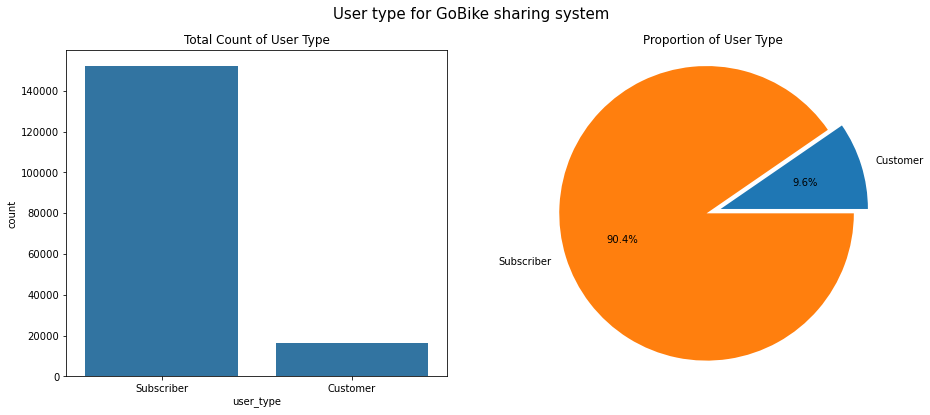

In [29]:
# User type for GoBike sharing system
plt.figure(figsize = [15, 6])

# plot showing count of each user_type on a bar chart
plt.subplot(1,2,1)
base_color = sb.color_palette()[0]
type_order = gobike_clean['user_type'].value_counts().index
sb.countplot(data=gobike_clean, x ='user_type', color=base_color, order=type_order)
plt.title('Total Count of User Type');

# This code will display the proportion of each type in pie chart
plt.subplot(1,2,2)
l_type = ['Customer', 'Subscriber']
sizes_type = [customer_prop, subscriber_prop]
plt.pie(sizes_type, explode=(0, 0.1), labels=l_type,autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of User Type');

# plot heading 
plt.suptitle('User type for GoBike sharing system', fontsize=15);

* From the bar and pie chart above depicting the total count  and proportion of each user type to the total population of users considered in the dataset, we can clearly see that users were majorly subscribers, with _90.4% of the whole users_, which are the registered members. The number of casual patronizers which are the customers are less than ten percent, _9.6% of the riders_.

In [30]:
# total count of each gender of users
print('\033[1m',gobike_clean['member_gender'].value_counts())

 Male      125170
Female     39672
Other       3567
Name: member_gender, dtype: int64


In [31]:
# calculating for the proportion for each gender with the total users
male_count = gobike_clean.query('member_gender == "Male"')['bike_id'].count()
female_count = gobike_clean.query('member_gender == "Female"')['bike_id'].count()
other_count = gobike_clean.query('member_gender == "Other"')['bike_id'].count()

male_prop = (male_count / gobike_clean['bike_id'].count()) *100
female_prop = (female_count / gobike_clean['bike_id'].count()) *100
other_prop = (other_count / gobike_clean['bike_id'].count()) *100

# print the proportion of each gender to the total users
print('\033[1m''Male_prop:',male_prop)
print('Female_prop:',female_prop)
print('Other_prop:',other_prop)

Male_prop: 74.3250063832693
Female_prop: 23.5569357932177
Other_prop: 2.1180578235129954


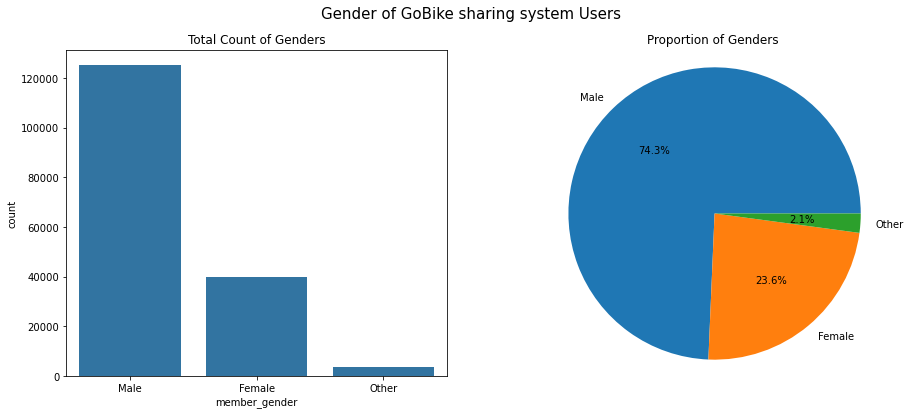

In [32]:
# Gender of GoBike sharing system users
plt.figure(figsize = [15, 6])

# plot showing count of each gender on a bar chart
plt.subplot(1,2,1)
gender_order = gobike_clean['member_gender'].value_counts().index
sb.countplot(data=gobike_clean, x ='member_gender', color=base_color, order=gender_order)
plt.title('Total Count of Genders');

# this code will display the proportion of each gender in pie chart
plt.subplot(1,2,2)
l_gender = ['Male', 'Female', 'Other']
sizes_gender = [male_prop, female_prop, other_prop]
plt.pie(sizes_gender, labels=l_gender,autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of Genders');

# plot heading 
plt.suptitle('Gender of GoBike sharing system Users', fontsize=15);

* From the charts above, we can see that there were more male users than other genders using the gobike sharing system, with male users being 74.3% of the total users.

In [33]:

print('\033[1m''Start Days:\n', gobike_clean['start_day'].value_counts())
print('End Days:\n',gobike_clean['end_day'].value_counts())

Start Days:
 Thursday     32390
Tuesday      29497
Wednesday    27381
Friday       26592
Monday       24687
Sunday       13975
Saturday     13887
Name: start_day, dtype: int64
End Days:
 Thursday     32385
Tuesday      29503
Wednesday    27372
Friday       26583
Monday       24690
Sunday       13981
Saturday     13895
Name: end_day, dtype: int64


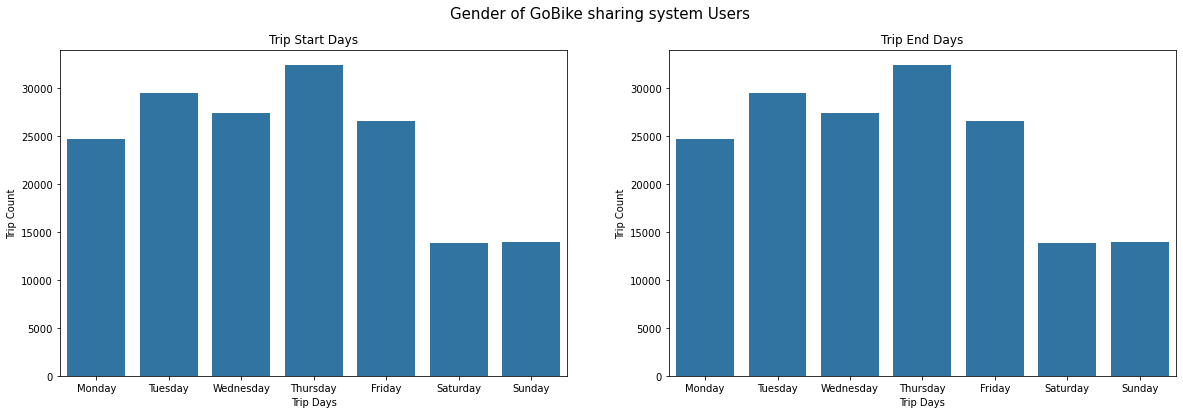

In [34]:
# def trip_days
def trip_days(subplot, week_day, title, ylabel, xlabel):
#     Trip start days
    plt.subplot(subplot[0], subplot[1], subplot[2])
    start_day_order = gobike_clean[week_day].value_counts().index
    sb.countplot(data=gobike_clean, x =week_day, color=base_color);
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

# def plot_trips
def plot_trips(plot_figure):
#     Plot heading
    plt.figure(figsize = plot_figure)
    trip_days((1, 2, 1), 'start_day', 'Trip Start Days', 'Trip Count', 'Trip Days')
    trip_days((1, 2, 2), 'end_day', 'Trip End Days', 'Trip Count', 'Trip Days')
    plt.suptitle('Gender of GoBike sharing system Users', fontsize=15);
    
plot_trips([20,6])

* The horizontal bar charts above shows that bike were used more on Thursday, as Thursday has both the highest start trips and end trips than other days of the week. Also from the charts we can see that trip count are low on the first day of the week and weekends compared the remaining days in the week.

In [35]:
# time of the day count
print('\033[1m',gobike_clean['time_of_day'].value_counts())

 Evening          51219
Morning          37167
Noon             36001
Early Morning    33396
Night             8558
Late Night        2068
Name: time_of_day, dtype: int64


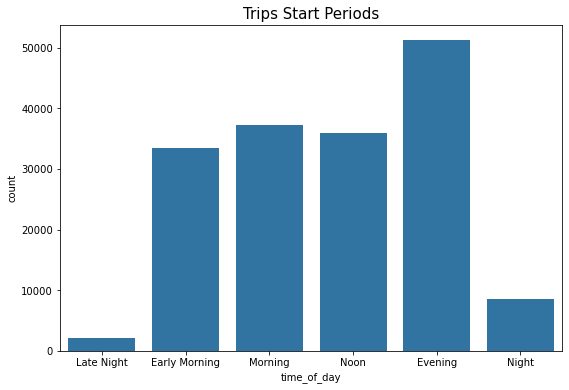

In [36]:
# bar chart showing time of the day more trips were taken
plt.figure(figsize = [9, 6])
sb.countplot(data=gobike_clean, x ='time_of_day', color=base_color)
plt.title('Trips Start Periods', fontsize=15);

* From the bar chart above the highest number of rides occured in the morning and in the evining. Which is considerably reaonable since most people start working between 8-9 a.m in the morning and finish around the hours of 5-6p.m in the evening.

In [37]:
# To get the max and min of the ages of the riders, remove rows with value as 0 in the age column
df_age_clean = gobike_clean.loc[~(gobike_clean['age'] == 0)]
# print out the max and min age of the riders
print('\033[1m''Oldest Rider:', df_age_clean['age'].max())
print('Youngest Rider:', df_age_clean['age'].min())

Oldest Rider: 59
Youngest Rider: 21


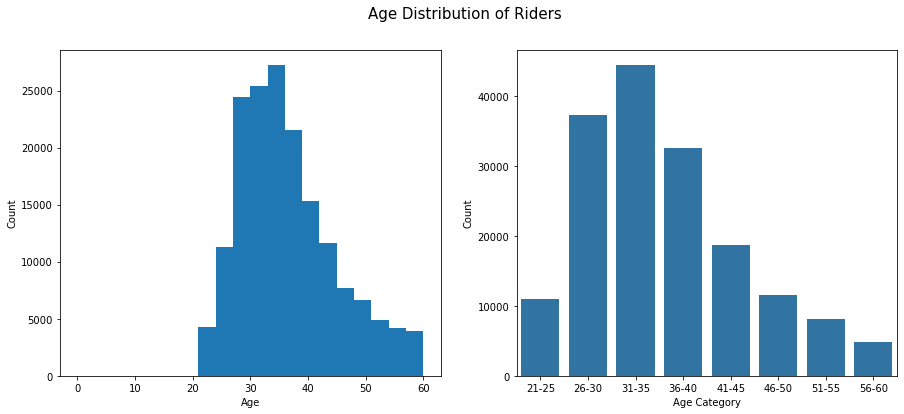

In [38]:
# ploting a histogram showing the age distribution of riders
plt.figure(figsize = [15, 6])

# histogram showing the age distribution of users
plt.subplot(1,2,1)
bins_age= np.arange(0, gobike_clean['age'].max()+3, 3)
plt.hist(data=gobike_clean, x='age',bins=bins_age)
plt.xlabel('Age', fontsize=10)
plt.ylabel('Count', fontsize=10);

# bar chart showing the age category that uses the bikes more for trips
plt.subplot(1,2,2)
sb.countplot(data=gobike_clean, x ='age_category', color=base_color)
plt.xlabel('Age Category')
plt.ylabel('Count');

# plot heading
plt.suptitle('Age Distribution of Riders', fontsize=15);

* The insights in the charts above indicates that there were more petronage from people that fall in the age bracket 26-35, compare to other age groups in the data.

In [39]:
# max and min duration of trips 
print('\033[1m''Duration mins max:', gobike_clean['duration_min'].max())
print('Duration mins min:', gobike_clean['duration_min'].min())

Duration mins max: 1409.0
Duration mins min: 1.0


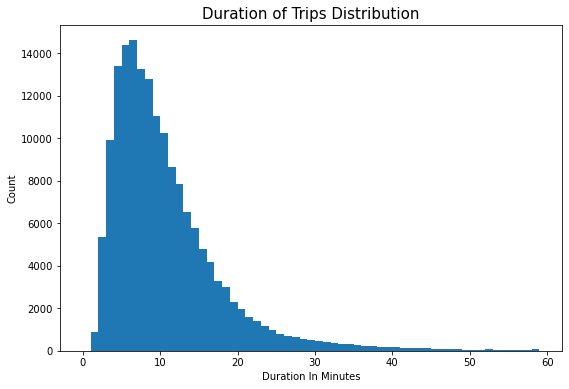

In [40]:
# histogram showing the duration distribtion of trips
plt.figure(figsize = [9, 6])
binz = np.arange(0, 60,1) #limiting the bins on the chart to be 1 hour so the histogram would be clearer
plt.hist(data=gobike_clean, x='duration_min', bins=binz);
plt.title('Duration of Trips Distribution', fontsize=15)
plt.xlabel('Duration In Minutes')
plt.ylabel('Count');

* The histograms shows that the users mostly emback on short trips with the bike.The number of rides keeps decreesing and duration of trip increases. Which indicates that the higher the trip duration, the lower the number of trips gets. This also indicates that there is a negative relationship between the trip duration and the number of trips.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The trip_duration variable has some unusual points where trips lasted more than 24 hours, I did some transformation by limiting the bins so that the histogram would be clearer to study.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> While investigating the dataset for insights, on the age column which was extracted from the member_birth column, there some unusall from _100 years above_, also noticed the riders above _sixty years_ were also very few. This could have been as a result _data entry errors_. In order to aid my analysis I removed the rows with null values in the column and removed the riders that their ages were above 60. This later resulted to the oldest age being 59 yers.

## Bivariate Exploration

In this section, I investigated relationships between pairs of variables in the data.

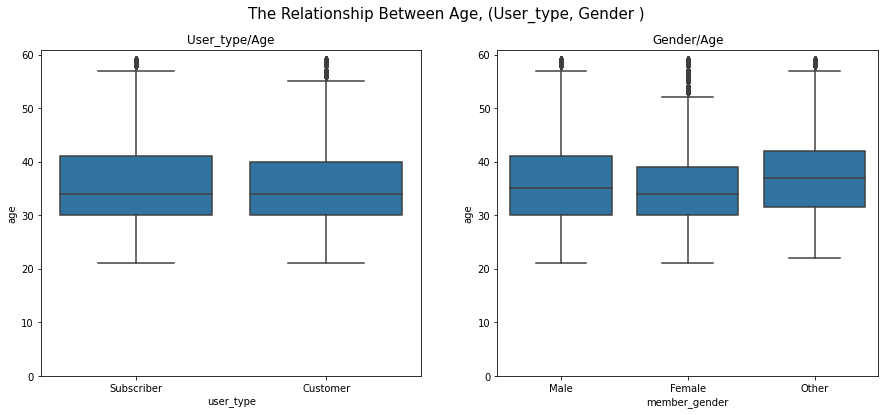

In [41]:
#The Relationship Between Age, (User_type, Gender )
plt.figure(figsize = [15, 6])

# box plot showing the relationship between the type of users and age
plt.subplot(1, 2, 1)
sb.boxplot(data=gobike_clean, x='user_type', y='age', color=base_color);
plt.ylim(ymin=0)
plt.title('User_type/Age');

# box plot showing the relationship between the gender and age of users
plt.subplot(1, 2, 2)
sb.boxplot(data=gobike_clean, x='member_gender', y='age', color=base_color);
plt.ylim(ymin=0)
plt.title('Gender/Age');

# plot heading
plt.suptitle('The Relationship Between Age, (User_type, Gender )', fontsize=15);

Each of the charts above visualizes the relationship between two variables;
* The first boxplot shows the relationship between the type of users and age. If we take a close look at the _whisker_ at the _top_(which represents the oldest), we will notice that there more old __subcriber-user__ than customer-user.

* The second boxplot shows the relationship between the gender of users and age. Taking a careful look at the chart we will notice that the __female gender__ has a younger population, considering that it has the _lowest highest age depicted by the top whisker_, lowest age average depicted by the middle line inside the box, of users than the remaining genders specified in the data.

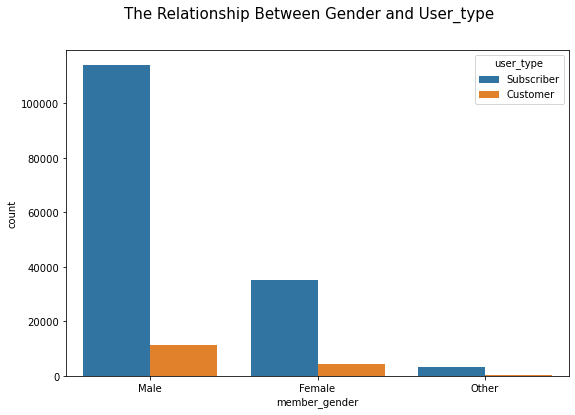

In [42]:
# def function for bivariate plots to be used later in exploration
def bi_plot(a, b, c, d, e):
    plt.figure(figsize = [a, b])
    sb.countplot(data = gobike_clean, x = c, hue = d);
    # plot heading
    plt.suptitle(e, fontsize=15);

# ploting to check the total of each type of users under each gender
bi_plot(9, 6, 'member_gender', 'user_type', 'The Relationship Between Gender and User_type')

* From the clustered chart above we can see that the male gender uses the bikes more compared to other genders, and it is also clear that the subscribers are more than the customers in every gender recorded in the data.

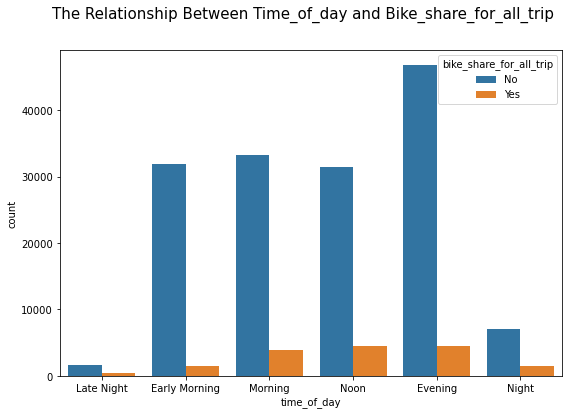

In [43]:
# ploting to check the total of each time of the day under bike_share_for_all_trip
bi_plot(9, 6, 'time_of_day', 'bike_share_for_all_trip', 'The Relationship Between Time_of_day and Bike_share_for_all_trip')

* From the chart above we can see that there are less bike share in the evening in that the primary aim of the riders at this particular period of time will be to get to their destination as the night is drawing near.


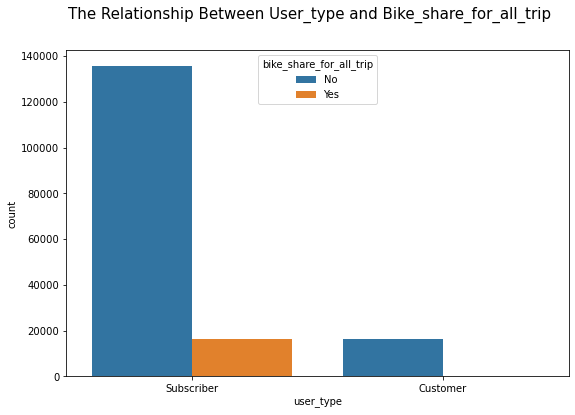

In [44]:
# ploting to check the total of each user type under bike_share_for_all_trip
bi_plot(9, 6, 'user_type', 'bike_share_for_all_trip', 'The Relationship Between User_type and Bike_share_for_all_trip')

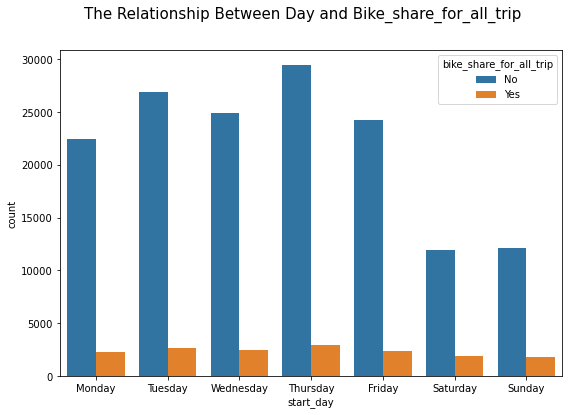

In [45]:
# ploting to check the total of each weekday under bike_share_for_all_trip
bi_plot(9, 6, 'start_day', 'bike_share_for_all_trip', 'The Relationship Between Day and Bike_share_for_all_trip')

* There are lesser no-bike-share for customer compared to subscriber but the population of each of these types is major determinat of the result. When we look futher we will also notice that there are no available bike share for customer while there is for subcribers, this can also as a result of the value being very small.
* From the chart above we can confirm that subcribers can get to share bike rides compare to customers.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

* There are some outliers in the ages of all the genders considered in this data.

* There are outliers in the bike share status of the Customer user type

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

* The female gender has a younger population, considering that it has the lowest highest age depicted by the top whisker, lowest age average depicted by the middle line inside the box, of users than the remaining genders specified in the data.

* There are more old subcriber-user than customer-user.

* Subcribers can get access to share bike rides compare to customers.

## Multivariate Exploration

> Creating plot of three or more variables to investigate the data even
further.

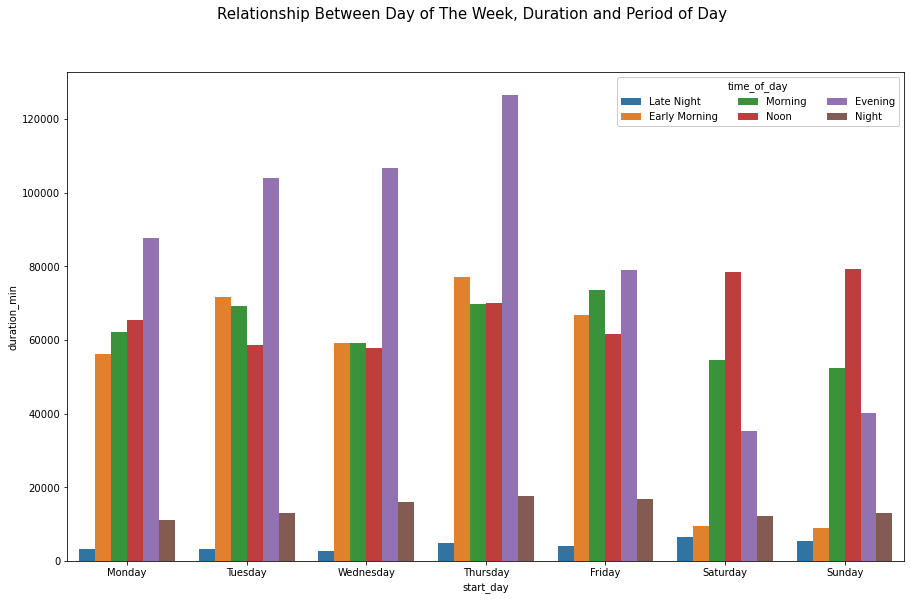

In [46]:
# futher investigation on the relationship between day of the week, duration and period of the day
plt.figure(figsize = [15,9])
ax = sb.barplot(data = gobike_clean, x = 'start_day', y = 'duration_min', hue = 'time_of_day', estimator = sum, ci=None);
ax.legend(loc = 'upper right', ncol = 3, framealpha = 1, title = 'time_of_day');

# plot heading
plt.suptitle('Relationship Between Day of The Week, Duration and Period of Day', fontsize=15);

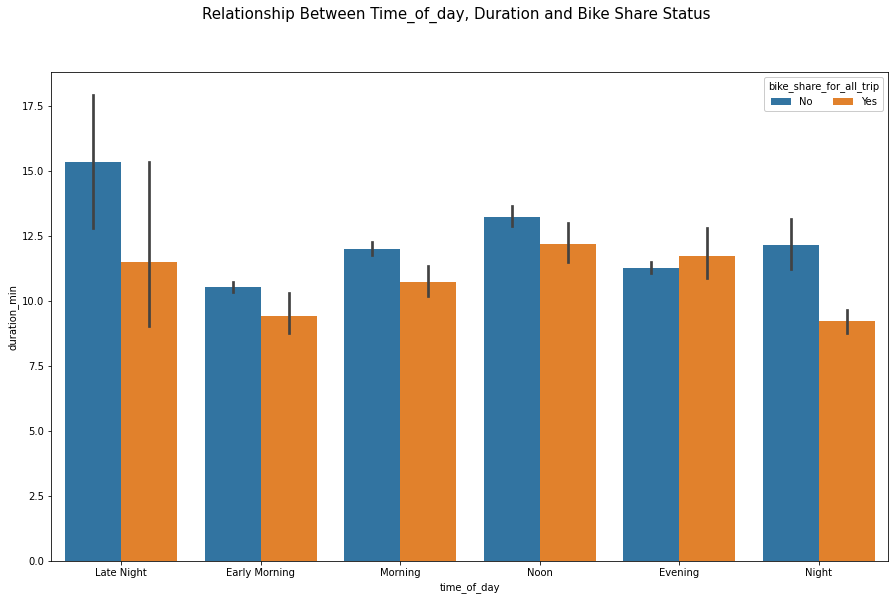

In [47]:
# futher investigation on the relationship between period of the day, duration and bike share status
plt.figure(figsize = [15,9])
ax = sb.barplot(data = gobike_clean, x = 'time_of_day', y = 'duration_min', hue = 'bike_share_for_all_trip');
ax.legend(loc = 'upper right', ncol = 3, framealpha = 1, title = 'bike_share_for_all_trip');

# plot heading
plt.suptitle('Relationship Between Time_of_day, Duration and Bike Share Status', fontsize=15);

* We have a peak for no share bike for all trip at late night and we can understand this because if you decide to take a bike late night, your main goal here is to reach your destination in minimum so the probability for bike sharing decrease  and the average distance per trip will increase.
* Also we can notice that early morning which is the time for the employee and students to go to thier companies and school, the time of the trip increase.
* And at the afternoon which the main time for students to finish school for the day also the distance of the trip increase.

### Were there any interesting or surprising interactions between features?

>  Early morning which is the time for the employee and students to go to thier companies and school, the time of the trip increase. And at afternoon which the main time students finish from school for the day also the distance of the trip increase.

## Conclusions
For this exploratory analysis, my area of interest were the type of user, time of the day and gender information for relationship insights with the bike trips and share.

In the course of exploring the variables considered in this analysis, from the beginning some basic insights were dicovered. One of these is that there are more suscriber type of user and the population of users in the data was dominated by the male gender with 74.3% of the total population. While exploring with one variable it was also dicovered that trips with this means were mostly embaked on during working days with significant reduction on weekends and also this trips peaked in the morning and evening.

In futher investigation using two variables to gather more enlightening insights from the data, we could see a trend of having outliers while checking the relationship between the age of users and the type of users. From the exploration of these two variables it was discovered riders under the customer type have younger age distribution compared to the subscriber type though there was no significant difference in the age distribution average. Also while exploring the age and gender variables it was shown that the female gender have a younger age distribution average than the rest of the genders.

Finally in exploration of this data a three variable analysis was carried out on time_of_day, duration_min and bike_share_for_all_trip. This visualization showed that morning hours of the day which is the time in which employees and students to go to thier companies and school, the bike share and duration of the trip increases. And in afternoon which is the main time students finish from school for the day also the distance of the trip increase.

One of the challenges face while carrying this analysis, was getting the meaning the some of the variables in the dataset.
